In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [3]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [4]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [5]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [6]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [7]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [8]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [9]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [10]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [11]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [12]:
data.dropna()

,0,1,2,3


In [13]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [14]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [15]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [16]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-1.338246,NaN,NaN
1,2.350612,NaN,NaN
2,-0.204333,NaN,-0.507063
3,2.208085,NaN,1.216089
4,-1.773180,0.290594,-0.617617
5,-0.314140,1.588628,1.292807
6,-0.230529,-1.248117,0.379127


In [17]:
df.fillna(0)

,0,1,2
0,-1.338246,0.000000,0.000000
1,2.350612,0.000000,0.000000
2,-0.204333,0.000000,-0.507063
3,2.208085,0.000000,1.216089
4,-1.773180,0.290594,-0.617617
5,-0.314140,1.588628,1.292807
6,-0.230529,-1.248117,0.379127


In [18]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-1.338246,0.500000,0.000000
1,2.350612,0.500000,0.000000
2,-0.204333,0.500000,-0.507063
3,2.208085,0.500000,1.216089
4,-1.773180,0.290594,-0.617617
5,-0.314140,1.588628,1.292807
6,-0.230529,-1.248117,0.379127


In [19]:
df.fillna(method="bfill")

,0,1,2
0,-1.338246,0.290594,-0.507063
1,2.350612,0.290594,-0.507063
2,-0.204333,0.290594,-0.507063
3,2.208085,0.290594,1.216089
4,-1.773180,0.290594,-0.617617
5,-0.314140,1.588628,1.292807
6,-0.230529,-1.248117,0.379127


In [20]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,-1.338246,NaN,-0.507063
1,2.350612,NaN,-0.507063
2,-0.204333,0.290594,-0.507063
3,2.208085,0.290594,1.216089
4,-1.773180,0.290594,-0.617617
5,-0.314140,1.588628,1.292807
6,-0.230529,-1.248117,0.379127


In [21]:
df.fillna(data.mean())

,0,1,2
0,-1.338246,6.500000,3.000000
1,2.350612,6.500000,3.000000
2,-0.204333,6.500000,-0.507063
3,2.208085,6.500000,1.216089
4,-1.773180,0.290594,-0.617617
5,-0.314140,1.588628,1.292807
6,-0.230529,-1.248117,0.379127


In [22]:
df.fillna(data.median())

,0,1,2
0,-1.338246,6.500000,3.000000
1,2.350612,6.500000,3.000000
2,-0.204333,6.500000,-0.507063
3,2.208085,6.500000,1.216089
4,-1.773180,0.290594,-0.617617
5,-0.314140,1.588628,1.292807
6,-0.230529,-1.248117,0.379127


Медиана более устойчива к выбросам

In [23]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<AxesSubplot:>

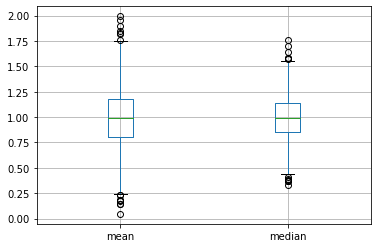

In [24]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [25]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,-1.338246,NaN,NaN,1
1,2.350612,NaN,NaN,1
2,-0.204333,NaN,-0.507063,0
3,2.208085,NaN,1.216089,0
4,-1.773180,0.290594,-0.617617,0
5,-0.314140,1.588628,1.292807,0
6,-0.230529,-1.248117,0.379127,0


Замена значений

In [26]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [27]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [28]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [29]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [30]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [32]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [33]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [34]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [38]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

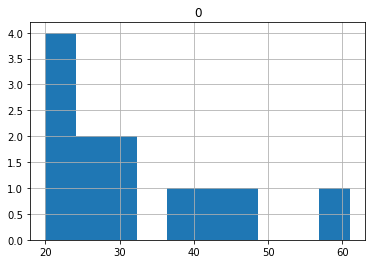

In [39]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [40]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [41]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [43]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

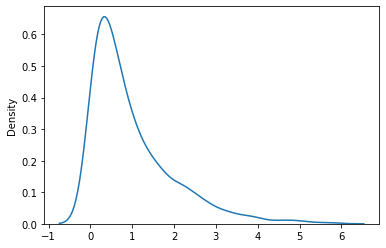

In [44]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

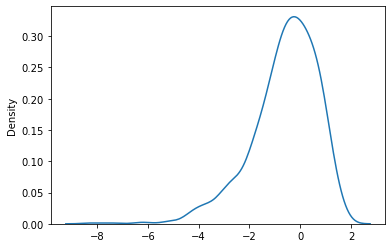

In [45]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

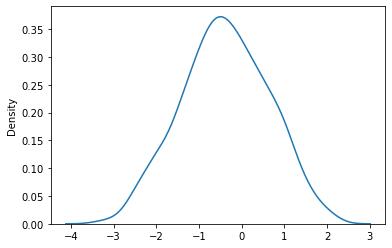

In [46]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [47]:
best_lambda

0.26485718228983585

# Домашнее задание

In [78]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [79]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

In [81]:
print(df.columns)

Index(['index', 'back-suspension', 'battery-capacity', 'charge-time',
       'compression', 'consumption-mixed', 'cylinders-order',
       'cylinders-value', 'engine-feeding', 'engine-start', 'engine-stop',
       'engine-type', 'gear-type', 'luxury', 'max-speed', 'power-electro-kw',
       'supply-system', 'valves', 'valvetrain', 'weight',
       'configurations_auto-premiere', 'configurations_back-wheel-base',
       'configurations_front-brake', 'configurations_safety-rating',
       'configurations_seats', 'configurations_tank-volume',
       'supergen_year-stop', 'models_country-from', 'models_group',
       'models_light-and-commercial', 'models_male', 'target'],
      dtype='object')


In [82]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43240    False
43241    False
43242    False
43243    False
43244    False
Length: 43245, dtype: bool

Дубликатов нет

In [86]:
df['durability'] = df['engine-stop'] - df['engine-start']

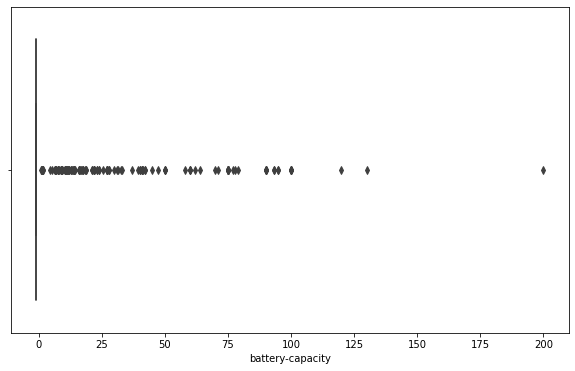

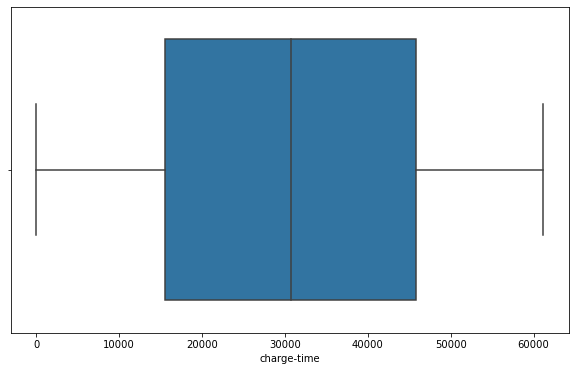

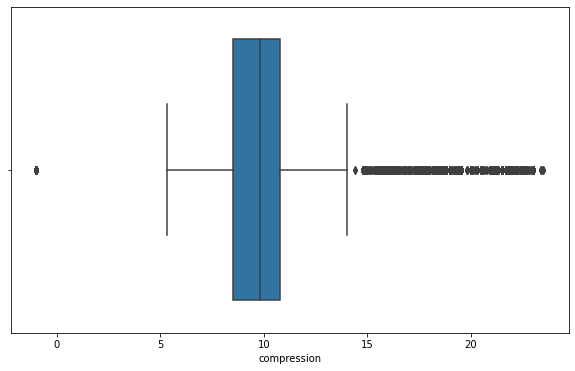

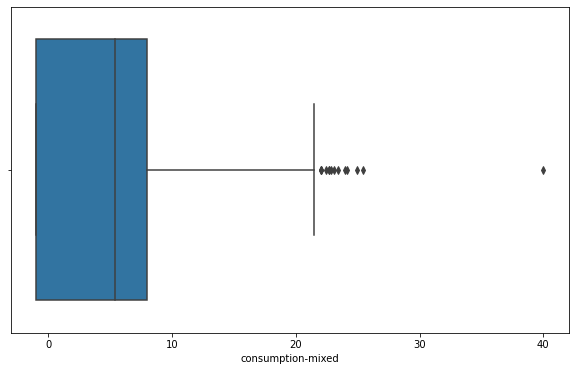

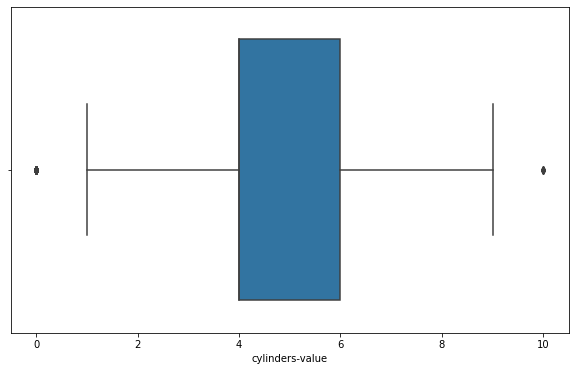

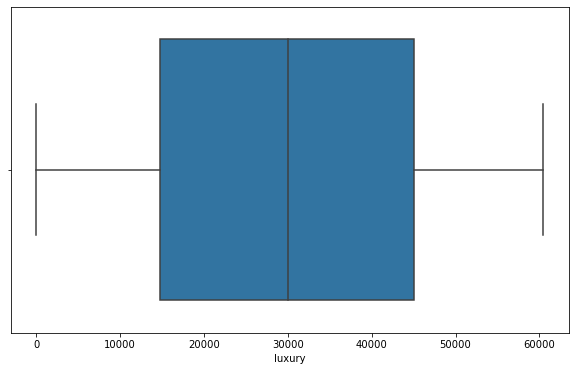

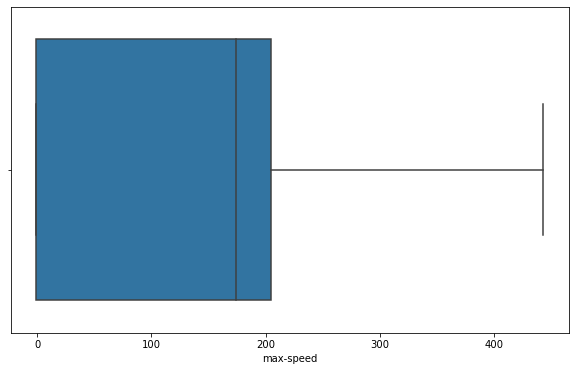

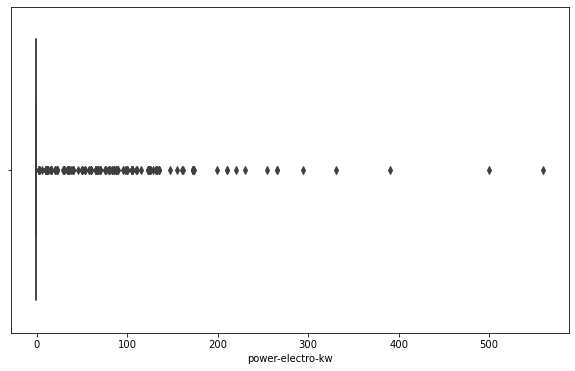

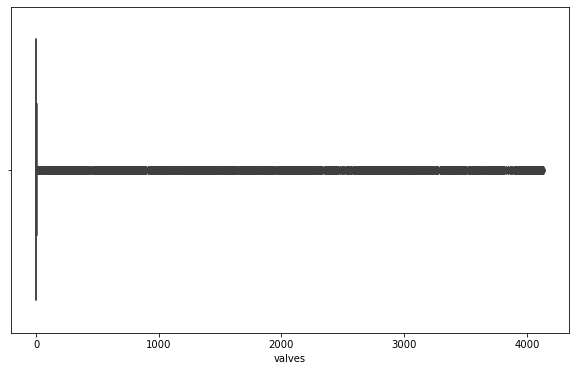

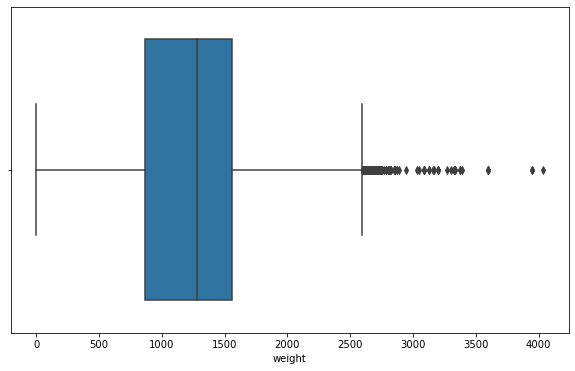

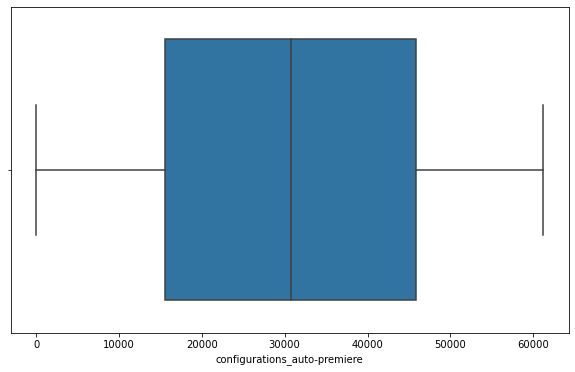

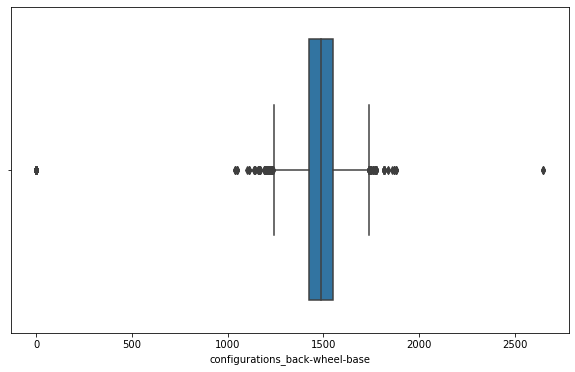

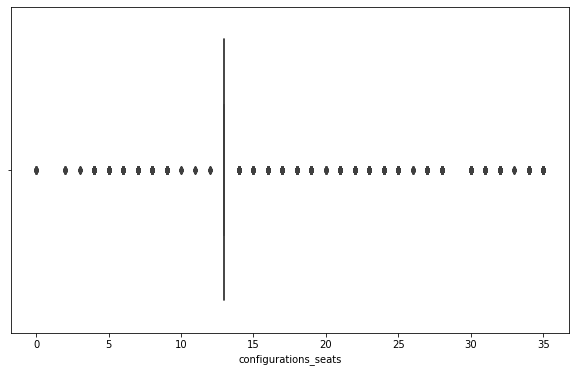

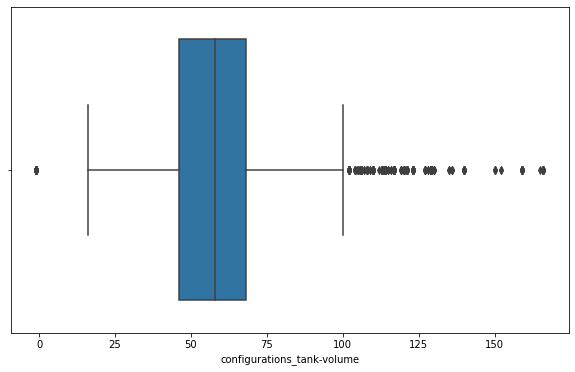

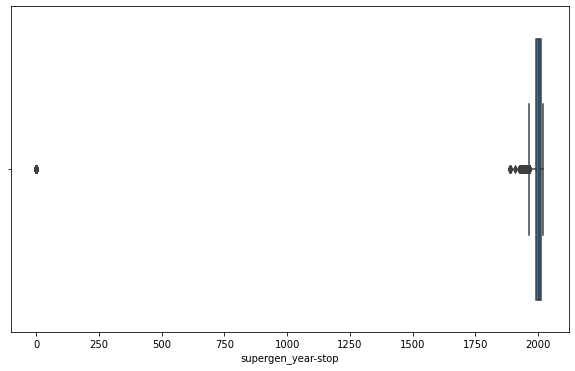

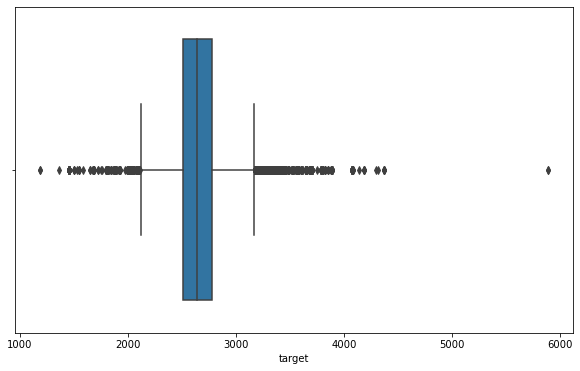

In [89]:
a = ['battery-capacity', 'charge-time',
       'compression', 'consumption-mixed',
       'cylinders-value','luxury', 'max-speed', 'power-electro-kw', 'valves', 'weight',
       'configurations_auto-premiere', 'configurations_back-wheel-base',
       'configurations_seats', 'configurations_tank-volume',
       'supergen_year-stop', 'target']
for c in a:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=c)
    plt.show()

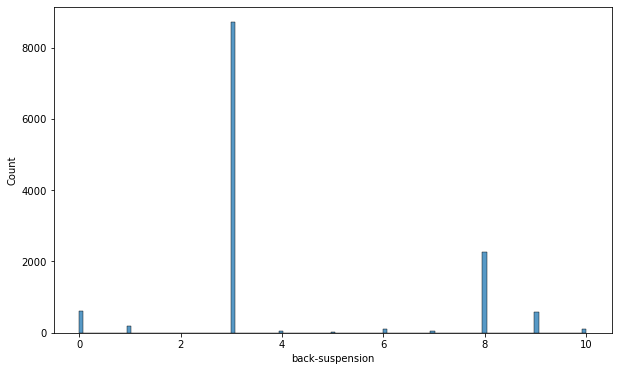

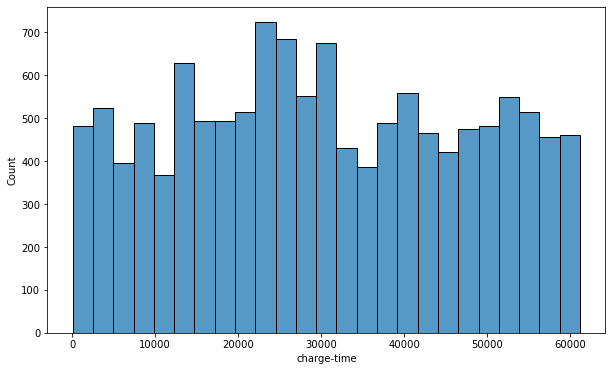

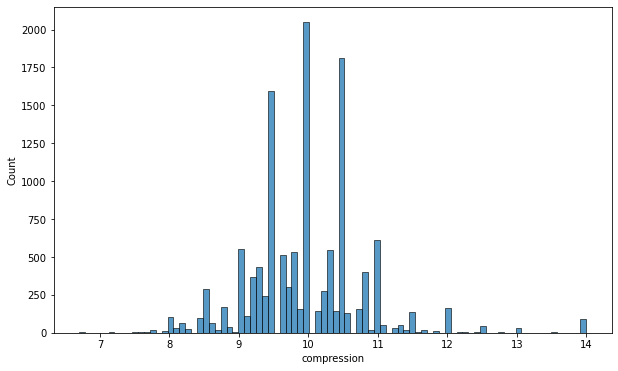

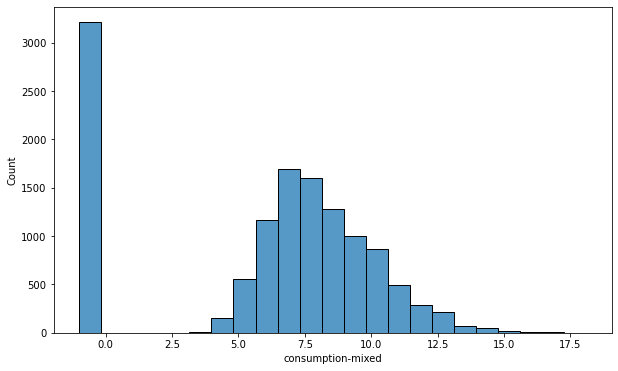

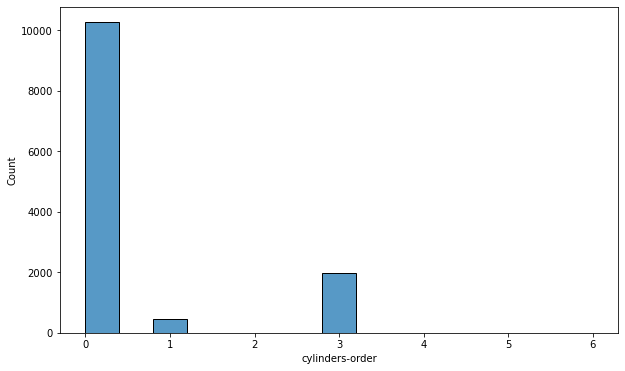

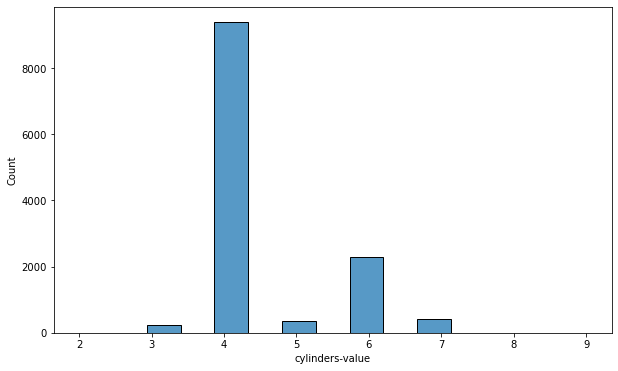

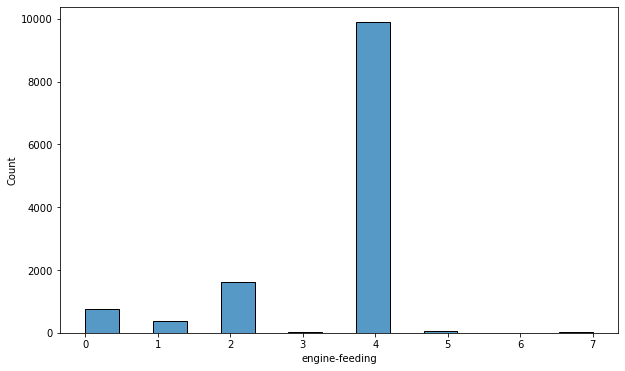

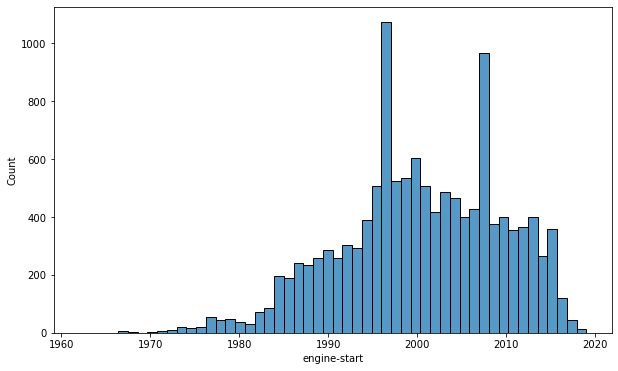

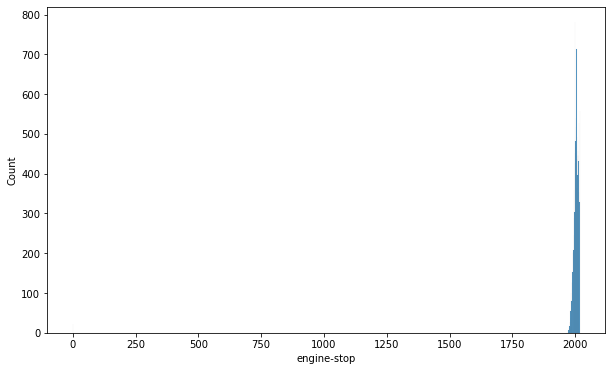

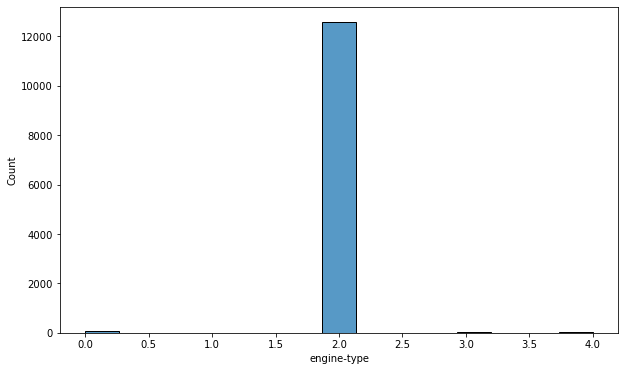

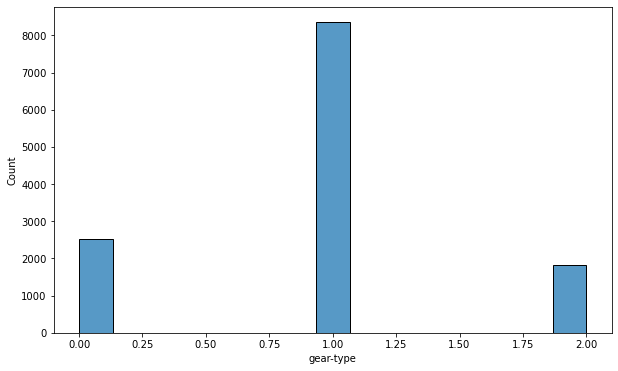

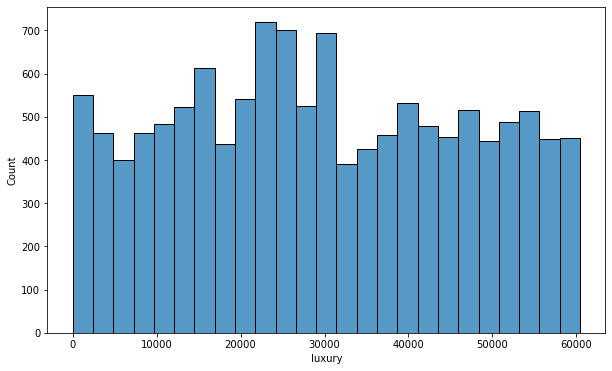

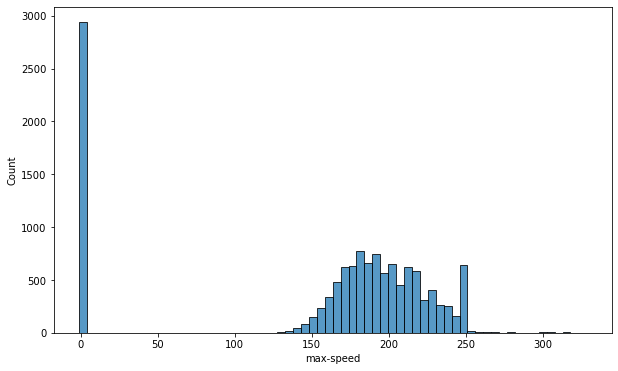

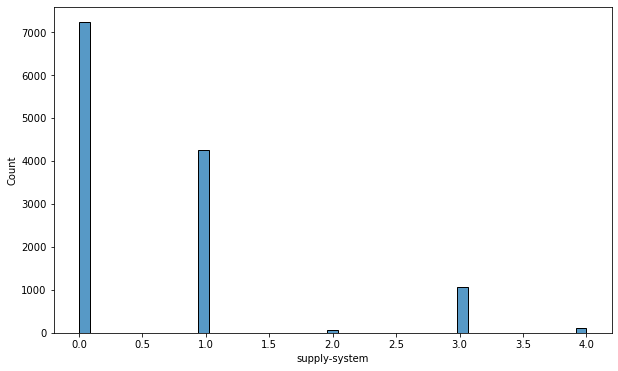

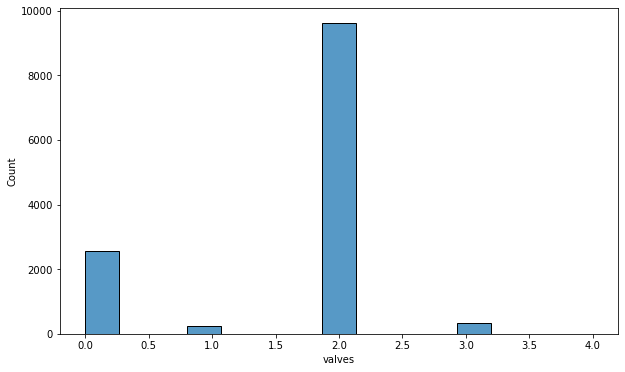

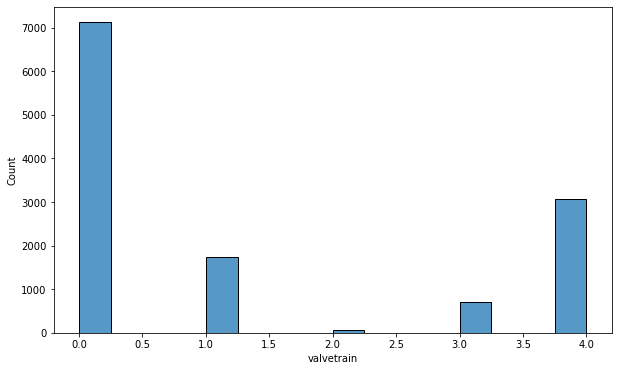

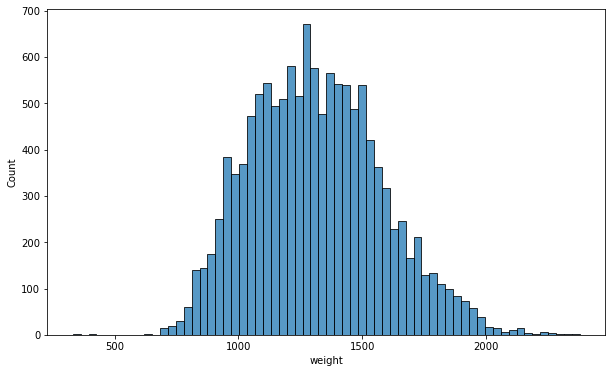

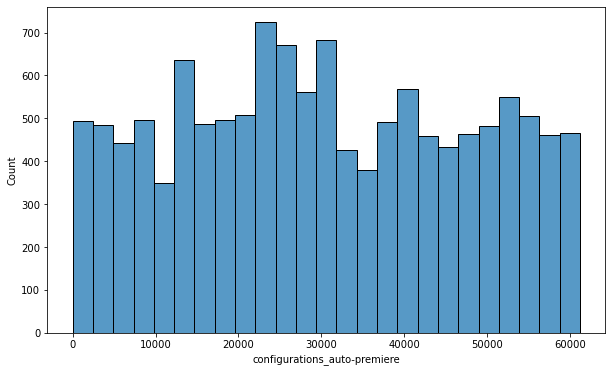

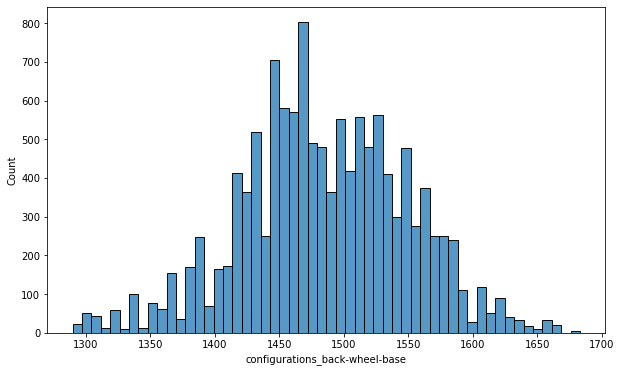

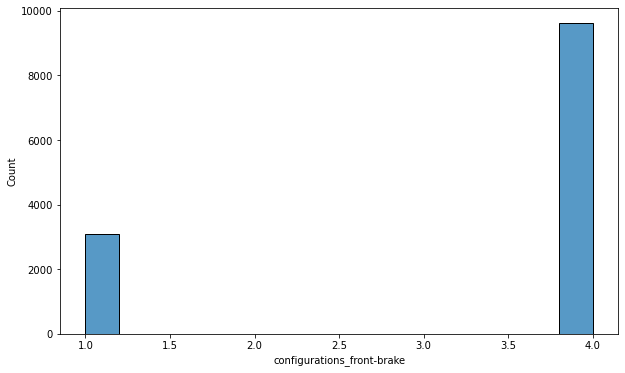

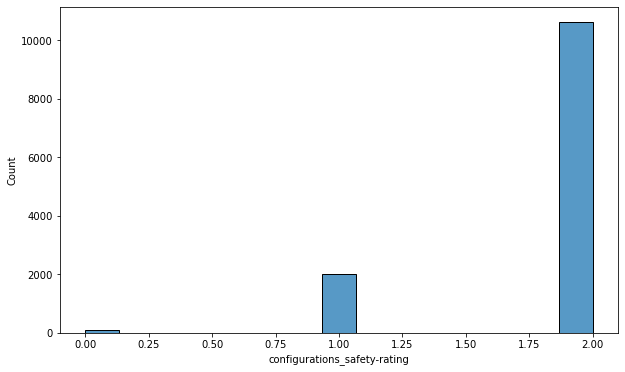

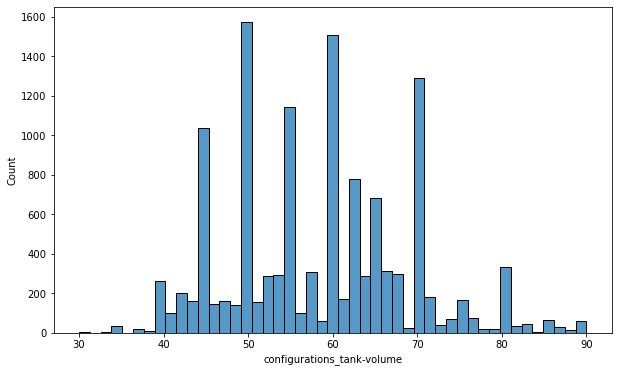

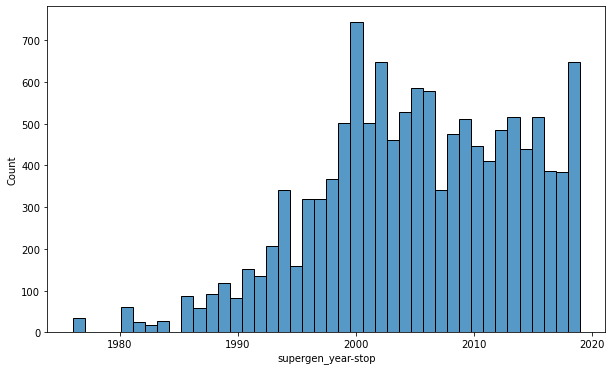

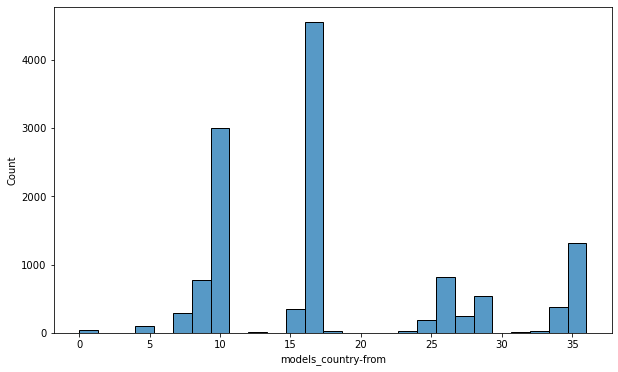

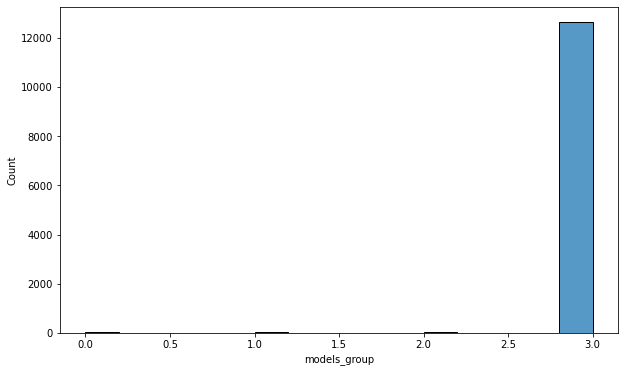

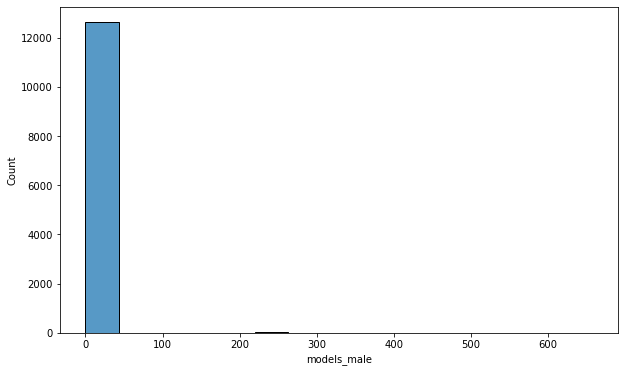

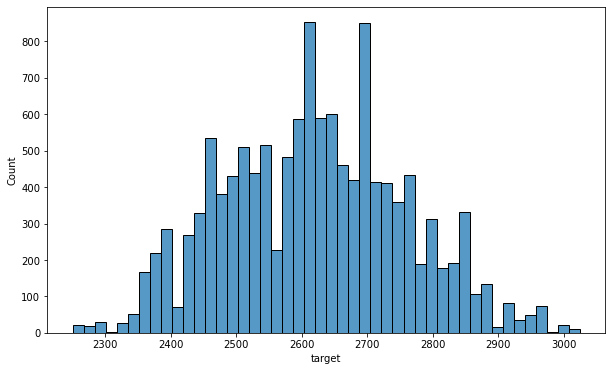

In [97]:
a = ['back-suspension', 'charge-time',
       'compression', 'consumption-mixed', 'cylinders-order',
       'cylinders-value', 'engine-feeding', 'engine-start', 'engine-stop',
       'engine-type', 'gear-type', 'luxury', 'max-speed',
       'supply-system', 'valves', 'valvetrain', 'weight',
       'configurations_auto-premiere', 'configurations_back-wheel-base',
       'configurations_front-brake', 'configurations_safety-rating', 'configurations_tank-volume',
       'supergen_year-stop', 'models_country-from', 'models_group', 'models_male', 'target']
for c in a:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=c)
    plt.show()

In [90]:
for c in a:
    q3 = df[c].describe()['75%']    # 75-ая квантиль
    q1 = df[c].describe()['25%']    # 25-ая квантиль
    iqr = q3-q1    # длина промежутка
    iqr_min = q1 - 1.5 * iqr    # нижняя граница
    iqr_max = q3 + 1.5 * iqr    # верхняя граница
    df = df[(iqr_min <= df[c]) & (df[c] <= iqr_max)]    # датасет без выбросов

In [93]:
df.shape #удаляем выбросы

(12717, 33)

In [98]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target,durability
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,2,13,40.0,2018.0,16,3,0,1,2360,12
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,2,13,55.0,2003.0,10,3,0,1,2513,3
5,8,8,-1.0,22100,9.6,6.0,0,4,2,2014,...,2,13,45.0,2017.0,10,3,0,1,2468,3
15,19,3,-1.0,30392,9.8,9.8,0,4,4,1992,...,2,13,60.0,1996.0,16,3,0,0,2580,4
18,22,3,-1.0,30308,9.8,-1.0,0,4,4,1995,...,2,13,60.0,2002.0,16,3,0,0,2580,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43229,61210,3,-1.0,43741,9.0,8.6,0,4,4,1994,...,2,13,63.0,1996.0,35,3,0,1,2664,2
43234,61216,8,-1.0,12898,10.5,6.1,0,4,4,2007,...,1,13,52.0,2014.0,10,3,0,1,2614,4
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,2,13,65.0,2015.0,10,3,0,1,2808,2
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,2,13,55.0,1999.0,16,3,0,1,2520,8


## Baseline

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [52]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
reg = LinearRegression().fit(train_X, train_y)

In [54]:
reg.score(train_X, train_y)

0.45554067850400515

In [55]:
mean_squared_error(reg.predict(train_X), train_y)

29840.12125086528

In [56]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [57]:
scores

{'fit_time': array([0.04494834, 0.03489161, 0.0359621 ]),
 'score_time': array([0.0078361 , 0.00926566, 0.00834489]),
 'test_score': array([-29836.8590711 , -29618.75539266, -30344.6536926 ])}

In [58]:
mean_squared_error(reg.predict(test_X), test_y)

31021.02439985435